In [3]:
import warnings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
warnings.filterwarnings('ignore')  # Игнорировать все предупреждения (не рекомендуется в продакшн-коде)
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from numpy import mean
from numpy import var
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from causalinference import CausalModel
from scipy.stats import chisquare
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.power import tt_ind_solve_power
from sklearn.metrics import r2_score

In [6]:
from dowhy import CausalModel

In [66]:
# df = pd.read_csv('./data/groupon.csv')[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'treatment', 'revenue']].rename(columns={'revenue':'y'})
df = pd.read_csv('./data/medicine_impact_recovery.csv').rename(columns={'medication':'treatment', 'recovery':'y'})
# df = pd.read_csv('./data/medicine_impact_recovery.csv').rename(columns={'medication':'treatment', 'recovery':'y'}).drop(columns='severity')

# df = pd.read_csv('./data/smoker.csv').rename(columns={'outcome':'y'})
df.head(2)

(20000, 5)


,sex,age,severity,treatment,y
0,0,35.049134,0.887658,1,31
1,1,41.580323,0.899784,1,49


In [92]:
df_ = df[15000:].copy()
dfs = df[:15000].copy()

In [93]:
dfs.shape

In [94]:
from sklearn.model_selection import train_test_split


y = dfs['treatment']
X = dfs.drop(columns='treatment')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)
# cat_features = ['sex']

In [95]:
from catboost import CatBoostClassifier
params = {'loss_function':'Logloss', # objective function
          'eval_metric': 'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train, 
          y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True ,
          cat_features = cat_features
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057616
0:	test: 0.9926282	best: 0.9926282 (0)	total: 6.07ms	remaining: 6.07s
200:	test: 0.9999994	best: 0.9999994 (159)	total: 627ms	remaining: 2.49s
400:	test: 0.9999994	best: 0.9999994 (159)	total: 1.16s	remaining: 1.74s
600:	test: 0.9999994	best: 0.9999994 (159)	total: 1.66s	remaining: 1.1s
800:	test: 0.9999994	best: 0.9999994 (159)	total: 2.12s	remaining: 526ms
999:	test: 0.9999994	best: 0.9999994 (159)	total: 2.63s	remaining: 0us

bestTest = 0.9999993841
bestIteration = 159

Shrink model to first 160 iterations.


In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [107]:
accuracy_score(y_pred, y_valid)

In [103]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(cbc_1.predict(df_.drop(columns='treatment')), df_['treatment']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3288
           1       1.00      1.00      1.00      1712

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import matplotlib
import imp
import eda_tools as eda
imp.reload(eda)
import seaborn as sns
import inspect

In [186]:
import eda_tools as eda
imp.reload(eda)

<module 'eda_tools' from '/Users/nikitagavrev/main/analytics_tools/eda_tools.py'>

In [153]:
x = np.arange(50) + 1
z = ''
y = x**2
z = x**3
df = pd.DataFrame({'x' : x, 'y' : y, 'z' : z})
df['cat'] = np.random.choice(['a', 'b', 'c'], len(x))

In [163]:
df.groupby('cat').y.mean()

cat
a     613.888889
b     816.200000
c    1154.823529
Name: y, dtype: float64

ИСПОЛЬЗУЕМ line ИЗ ВОЗМОЖНЫХ  {'line': 'lineplot', 'scatter': 'scatterplot', 'hist': 'histplot', 'joint': 'jointplot', 'pair': 'pairplot', 'heatmap': 'heatmap', 'box': 'boxplot', 'bar': 'barplot', 'violin': 'violinplot'}
ПОЛЕЗНЫЕ ОПЦИИ ДЛЯ line: x,y; hue=цвет; marker=вид точки=o,s; linestyle=--,-.; label=str
ДОП ПАРАМЕТРЫ ОТОБРАЖЕНИЯ ГРАФИКА: figsize, xlabel, ylabel, title, xlim, ylim=(a,b), xstep, ystep
----------
x, y : vectors or keys in ``data``
    Variables that specify positions on the x and y axes.
hue : vector or key in ``data``
    Grouping variable that will produce lines with different colors.
    Can be either categorical or numeric, although color mapping will
    behave differently in latter case.
size : vector or key in ``data``
    Grouping variable that will produce lines with different widths.
    Can be either categorical or numeric, although size mapping will
    behave differently in latter case.
style : vector or key in ``data``
    Grouping variable that will pr

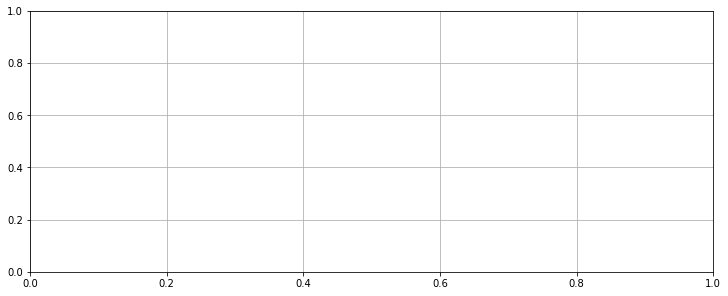

In [187]:

ax = eda.get_subplots((10, 4), 1, 1)
# eda.make_plot('violin', {'x' : df.cat, 'y' : df.y, 'ax' : ax[0], 'label' : '1'}, docs=False)
# eda.make_plot('box', {'x' : df.cat, 'y' : df.y, 'ax' : ax[1]}, docs=False)
eda.make_plot('line', {'y' : y, 'xstep' : 5, 'ax' : ax, 'xlim' : (0, 100)}, docs=True)


# eda.make_plot('hist', {'x' : x, 'y' : 2*y, 'ax' : ax[0], 'label' : '2'}, docs=False)

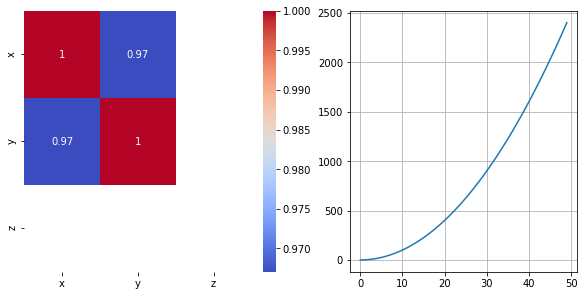

In [113]:
ax = eda.get_subplots((8, 4), 1, 2)

x = np.arange(50)
y = x**2
z = np.zeros(50) + 1
q = np.arange(50)
df = pd.DataFrame({'x' : x, 'y' : y, 'z' : z})
# params = {'x' : x, 'y' : y, 'kind' : 'hex'}
# params = {'x' : x, 'y' : y, 'kind' : 'resid'}
params = {'data' : df.corr(), 'ax' : ax[0]}
eda.make_plot(style='heatmap', params=params, docs=False)params = {'y' : y, 'ax' : ax[1]}
eda.make_plot(style='line', params=params, docs=False)
# make_plot(x, ax=ax, style='hist', params={'bins' : 50, 'stat' : 'frequency'}, docs=True)
# make_plot(x, ax=ax, style='scatter', params={'bins' : 50, 'stat' : 'frequency'}, docs=True)
# make_plot(style='hist', params=params2, ax=ax[0])

# make_plot(x, y, ax[1], style='line')
# ax[0].hist(y)

# sns.pairplot(x, y, ax=ax, params)

In [102]:
np.corrcoef(x, y)

array([[1.        , 0.96705085],
       [0.96705085, 1.        ]])

In [29]:
def params_flt(params, keys, keys_custom):
        if keys_custom is not None:
            flt = keys_custom
        else:
            flt = keys
        return {j : params[j] for j in params.keys() if j in flt}
params_flt({'a' : 1, 'c' : 2}, ['a', 'b'], None)

{'a': 1}

In [35]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

<AxesSubplot:ylabel='Count'>

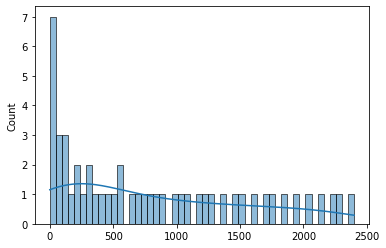

In [15]:
sns.histplot(y, bins=50, kde=True, palette = 'viridis')